In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("student-mat.csv", sep=';')  # delimiter is ; in this dataset

# Display first few rows
df.head()


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [3]:
# Check for missing values
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [4]:
# Data types
df.dtypes


school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [5]:
# Dataset shape
df.shape


(395, 33)

In [6]:
# Drop duplicates if any
df.drop_duplicates(inplace=True)

# (No missing values expected, but if there were any)
# df.fillna(df.median(), inplace=True)  # or df.dropna()

In [7]:
avg_g3 = df['G3'].mean()
avg_g3


np.float64(10.415189873417722)

In [8]:
high_scorers = df[df['G3'] > 15].shape[0]
high_scorers


40

In [9]:
correlation = df['studytime'].corr(df['G3'])
correlation


np.float64(0.09781968965319626)

In [10]:
avg_by_gender = df.groupby('sex')['G3'].mean()
avg_by_gender


sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

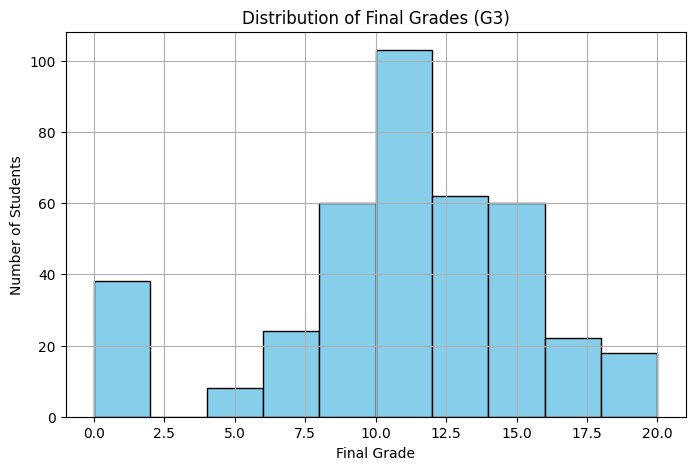

In [11]:
plt.figure(figsize=(8,5))
plt.hist(df['G3'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.grid(True)
plt.show()


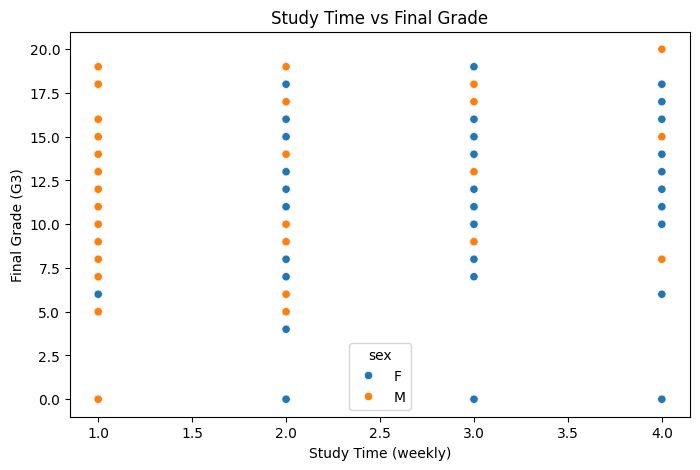

In [12]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='studytime', y='G3', hue='sex')
plt.title('Study Time vs Final Grade')
plt.xlabel('Study Time (weekly)')
plt.ylabel('Final Grade (G3)')
plt.show()


/var/folders/d8/35cr7ttx3k5_byw13_f6kv040000gn/T/ipykernel_76478/3951398175.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_gender, x='sex', y='G3', palette='pastel')


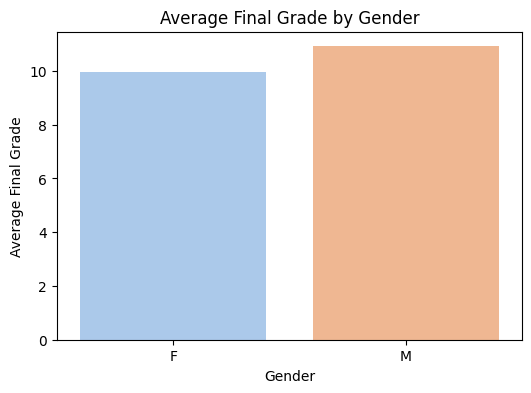

In [13]:
avg_gender = df.groupby('sex')['G3'].mean().reset_index()

plt.figure(figsize=(6,4))
sns.barplot(data=avg_gender, x='sex', y='G3', palette='pastel')
plt.title('Average Final Grade by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Final Grade')
plt.show()
